In [5]:
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import xarray as xr
from source2 import *

In [11]:
def plot_all_(
    df_cnr=None,
    df_lidar=None,
    tup_mean=None,
    tup_std=None,
    tup_median=None,
    wind_std=None,
    date="",
    cbarlbl = "CNR (dB)"
):

    """
    The function plots all calculated CNR values on a heatmap/contour plot

    input:
    cnr data frane
    pbl datafrane
    tuples for mean, median and std
    the date (as string) for title name

    outputs:
    heatmap graph with imposed graph lines
    """
    import matplotlib.pyplot as plt
    import numpy as np
    import seaborn as sns
    fig, ax =plt.subplots(figsize = (10,10))
    pcnr= df_cnr.transpose()
    pcnr.index = pcnr.index.astype(int)
    pcnr.columns = pcnr.columns.hour
    
    # np.flip(pcnr.index.values),np.flip(pcnr.values)
    CS = plt.pcolormesh(pcnr.columns,np.flip(pcnr.index.values),np.flip(pcnr.values), cmap= "seismic")
    cbar = fig.colorbar(CS)
    cbar.ax.set_ylabel('CNR (dB)')
    #xticklabels,
    #sns.heatmap(pcnr, xticklabels= False,cmap = "seismic")
    
    plt.plot(tup_mean[0].hour, tup_mean[1], label = "CNR-mean derived Values", color = "lime")
    plt.plot(tup_std[0].hour, tup_std[1], label = "CNR-STD derived Values", color = "deeppink")
    plt.plot(tup_median[0].hour, tup_median[1], label = "CNR-Median derived Values", color = "white")
    plt.plot(wind_std[0].hour, wind_std[1], label = "Wind Variance", color = "black")
    plt.plot(df_lidar.index.hour,df_lidar, label = "LiDAR Values", color = "yellow")
    plt.title("PBL Calculations for "+ date)

    fig, ax = plt.subplots(figsize=(10, 10))
    pcnr = df_cnr.transpose()
    pcnr.index = pcnr.index.astype(int)
    # pcnr.columns = pcnr.columns.hour
    # CS = plt.contourf(pcnr.columns, np.flip(pcnr.index.values),np.flip(pcnr.values), cmap= "seismic")
    CS = plt.pcolormesh(pcnr.columns, pcnr.index.values, pcnr.values, cmap="seismic")
    cbar = fig.colorbar(CS)
    cbar.ax.set_ylabel(cbarlbl)
    fig.autofmt_xdate()
    tlist = (list, np.ndarray, tuple)
    if isinstance(tup_mean, tlist):
        plt.plot(
            tup_mean[0].hour, tup_mean[1], label="CNR-mean derived Values", color="lime"
        )
    if isinstance(tup_std, tlist):
        ax.plot(
            tup_std[0], tup_std[1], label="CNR-STD derived Values", color="deeppink"
        )
    if isinstance(tup_median, tlist):
        plt.plot(
            tup_median[0].hour,
            tup_median[1],
            label="CNR-Median derived Values",
            color="white",
        )
    if isinstance(wind_std, tlist):
        plt.plot(wind_std[0].hour, wind_std[1], label="Wind Variance", color="black")
    if isinstance(df_lidar, tlist):
        plt.plot(df_lidar.index.hour, df_lidar, label="LiDAR Values", color="yellow")
    plt.title("PBL Calculations for " + date)

    plt.ylabel("Heigth (m)")
    plt.xlabel("Time (UTC)")
    plt.legend()
    plt.gcf()

    plt.show()
    

In [12]:
def do_the_thing(C, date):
    
    variables.extract()
    cnr_17 = variables.cnr_day
    time_17 = pd.to_datetime(variables.time_day, unit = 's', utc = True)
    
    
    
    july17_cnr = dataframe_set(cnr_17, time_17, date)

                    #pbl_height
    july17_cnrmean = pbl_height(july17_cnr, stat = "mean", var_type = "CNR")
    july17_cnrstd = pbl_height(july17_cnr, var_type = "CNR")
    july17_cnrmedian = pbl_height(july17_cnr, stat = "median", var_type = "CNR")


    #Getting liDAR derived values for PBL

    pbl_17 = variables.atm_structures
    df_structures_17 = dataframe_set(pbl_17, time_17, date)
    lidar_pbl17 = pbl_lidar(df_structures_17)

    #lidar_pbl17 = lidar_pbl17[lidar_pbl17.index.date ==pd.Timestamp("2021-07-17").date()]

    windsp_17 = variables.ver_wind_speed
    df_wind = dataframe_set(windsp_17, time_17, date)
    
    wind_var = pbl_height(df_wind,  var_type = "wind")



    plot_all_(july17_cnr,lidar_pbl17,july17_cnrmean, july17_cnrstd,july17_cnrmedian, wind_var,date)



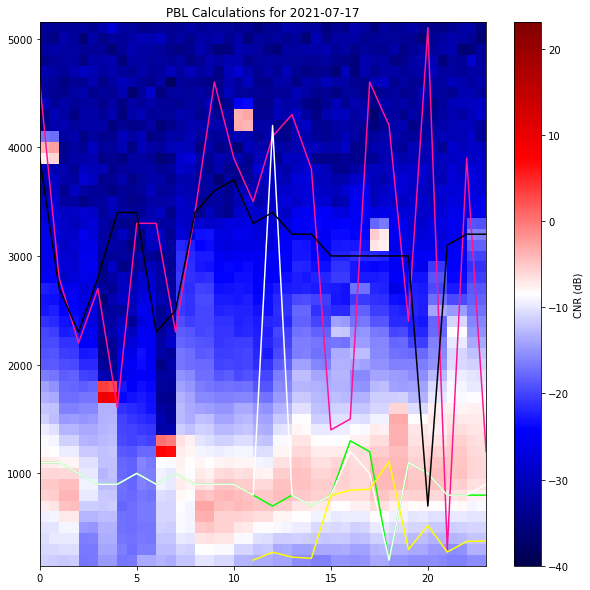

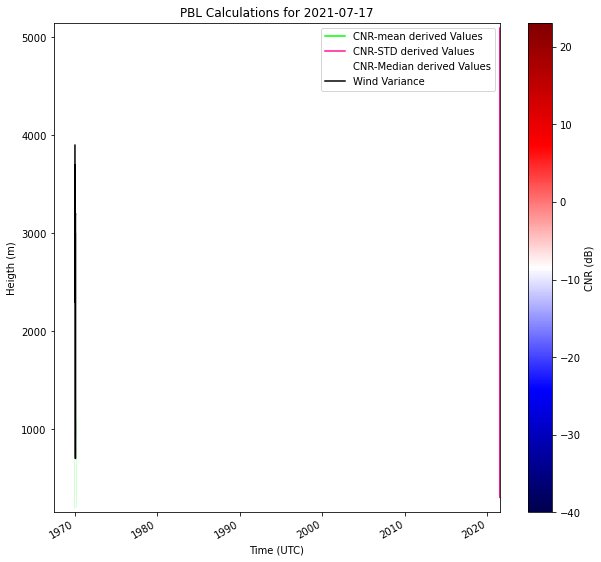

In [13]:
path0 = "/Users/jenifervivar/Desktop/NERTO_2022/LIDAR_JUN17-30_2021/FXD20210717/"
variables = VAREXTRACT(path0)
do_the_thing(variables, "2021-07-17")

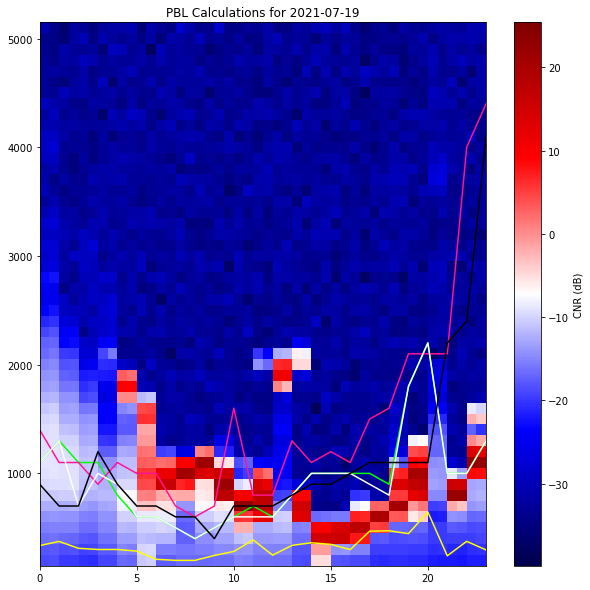

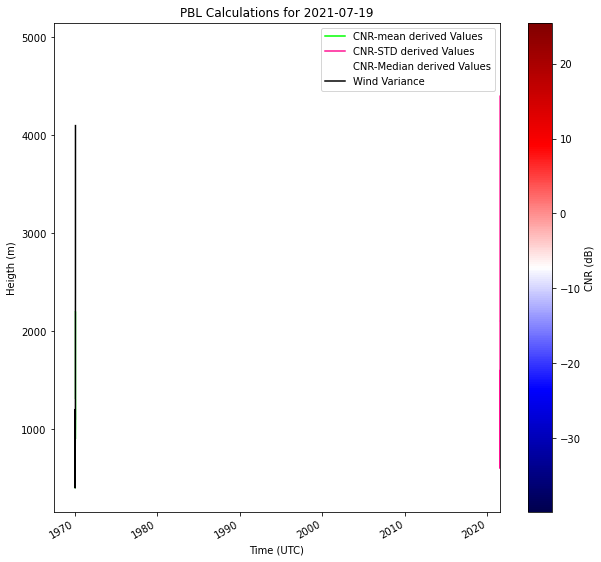

In [14]:
path1 = "/Users/jenifervivar/Desktop/NERTO_2022/LIDAR_JUN17-30_2021/FXD20210719/"
variables = VAREXTRACT(path1)
do_the_thing(variables, "2021-07-19")

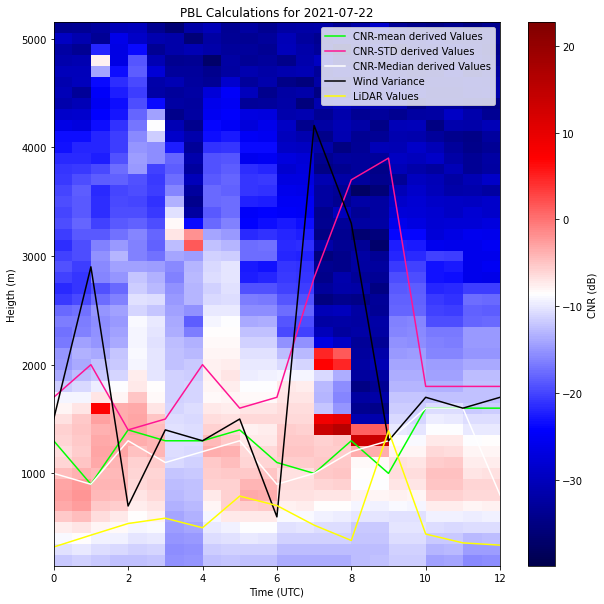

In [5]:
path2 = "/Users/jenifervivar/Desktop/NERTO_2022/LIDAR_JUN17-30_2021/FXD20210722/"
variables = VAREXTRACT(path2)
do_the_thing(variables, "2021-07-22")

/Users/jenifervivar/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


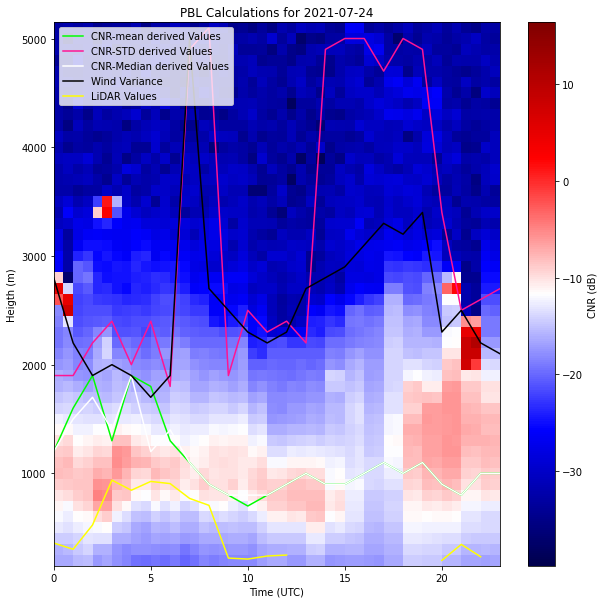

In [6]:
path3 = "/Users/jenifervivar/Desktop/NERTO_2022/LIDAR_JUN17-30_2021/FXD20210724/"
variables = VAREXTRACT(path3)
do_the_thing(variables, "2021-07-24")

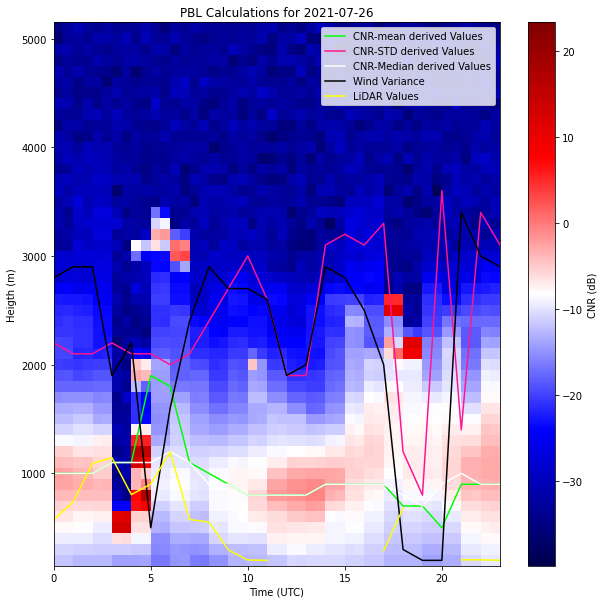

In [7]:
path4 = "/Users/jenifervivar/Desktop/NERTO_2022/LIDAR_JUN17-30_2021/FXD20210726/"
variables = VAREXTRACT(path4)
do_the_thing(variables, "2021-07-26")

/Users/jenifervivar/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


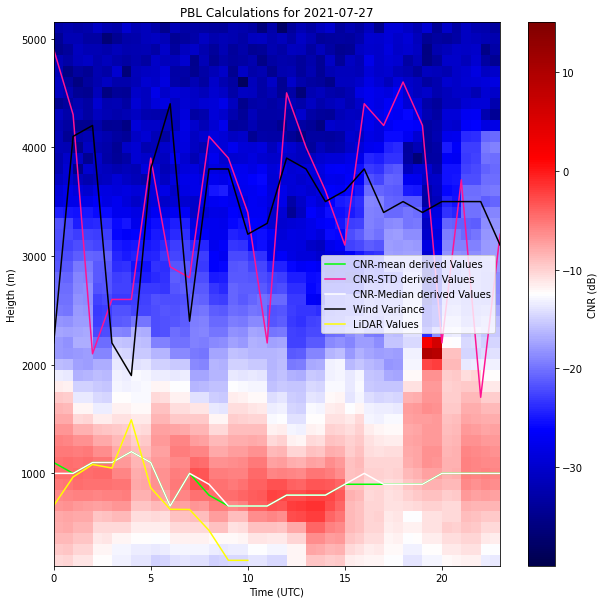

In [8]:
path5 = "/Users/jenifervivar/Desktop/NERTO_2022/LIDAR_JUN17-30_2021/FXD20210727/"
variables = VAREXTRACT(path5)
do_the_thing(variables, "2021-07-27")